In [ ]:
# import necessary python packages 

import pandas as pd
import seaborn as sns
import requests
from bs4 import BeautifulSoup
from datetime import date
import csv
import os
import json
import urllib.request
from datetime import date
import matplotlib.pyplot as plt

# Data Acqusition
Read the data from the crawled csv file and display the dataframe general view

In [ ]:
# Read data from a CSV file into a data frame
df = pd.read_csv('zillow.csv')

# Display the first five rows of the data frame to examine if it is an individual-level data set
print(df.head())

# Display the variable list
print(df.columns.values)

# Display the number of rows and the number of columns in the data set to confirm the portrait shape
# The first element of the output is the number of rows and the second is the number of columns 
print(df.shape)

                                              h_link  ...      lot
0  https://www.zillow.com/homedetails/34-Joyce-Ln...  ...  10890.0
1  https://www.zillow.com/homedetails/61-Cypress-...  ...  11326.0
2  https://www.zillow.com/homedetails/69-Walter-A...  ...  11326.0
3  https://www.zillow.com/homedetails/6-Park-Ct-P...  ...  11326.0
4  https://www.zillow.com/homedetails/6-Lesley-Ln...  ...  11326.0

[5 rows x 19 columns]
['h_link' 'num_of_bed' 'num_of_bath' 'square' 'price' 'zestimate' 'year'
 'month' 'date' 'Unnamed: 9' 'town' 'state' 'zipcode' 'house_type'
 'year_built' 'heating' 'cooling' 'parking' 'lot']
(659, 19)


In [ ]:
#show all the attributes' data types
df.dtypes

h_link          object
num_of_bed     float64
num_of_bath    float64
square         float64
price            int64
zestimate      float64
year             int64
month            int64
date             int64
Unnamed: 9     float64
town            object
state           object
zipcode          int64
house_type      object
year_built     float64
heating         object
cooling         object
parking         object
lot            float64
dtype: object

# Data Cleaning
Impute missing / NA values and convert the attribute' data type into properly ones

In [ ]:
#check total counts of missing values of each attribute
df.isnull().sum()

h_link           0
num_of_bed      29
num_of_bath     12
square         267
price            0
zestimate       58
year             0
month            0
date             0
Unnamed: 9     659
town             0
state            0
zipcode          0
house_type       0
year_built       9
heating         15
cooling         41
parking          0
lot             20
dtype: int64

In [ ]:
# Drop the observations that contain missing dependent variable values
# Placeholder variable is DV
DV = 'price'
df1 = df.copy()
df1 = df1.dropna(subset=[DV])
df1.head()

,h_link,num_of_bed,num_of_bath,square,price,zestimate,year,month,date,Unnamed: 9,town,state,zipcode,house_type,year_built,heating,cooling,parking,lot
0,https://www.zillow.com/homedetails/34-Joyce-Ln...,6.0,3.0,3299.0,1080000,1096500.0,2021,10,13,NaN,Woodbury,NY,11797,Single Family Residence,1967.0,Natural Gas,Central Air,2 Attached Garage spaces,10890.0
1,https://www.zillow.com/homedetails/61-Cypress-...,3.0,2.0,NaN,555000,561800.0,2021,10,21,NaN,Bethpage,NY,11714,Single Family Residence,1956.0,Natural Gas,Central Air,1 Attached Garage space,11326.0
2,https://www.zillow.com/homedetails/69-Walter-A...,6.0,4.0,2663.0,875000,NaN,2021,11,15,NaN,Hicksville,NY,11801,Single Family Residence,1981.0,Natural Gas,Wall Unit(s),1 Attached Garage space,11326.0
3,https://www.zillow.com/homedetails/6-Park-Ct-P...,5.0,3.0,3662.0,1350000,1360000.0,2021,11,10,NaN,Plainview,NY,11803,Single Family Residence,2021.0,Natural Gas,Central Air,2 Attached Garage spaces,11326.0
4,https://www.zillow.com/homedetails/6-Lesley-Ln...,NaN,1.5,1592.0,560000,641300.0,2021,11,9,NaN,Bethpage,NY,11804,SingleFamily,1957.0,Other,Central,Garage - Attached,11326.0


In [ ]:
df2 = df1.copy()

In [ ]:
#df2['price'] = df2['price'].astype(str).str.replace('$', '').str.replace(',', '')
#df2['price'] = pd.to_numeric(df2['price'], errors='coerce').fillna(df2['price'].median(), inplace=True)
df2['price'] = df2['price'].astype('int64')

In [ ]:
#df2['year_built'] = df2['year_built'].str.replace('Build in ', '')
df2['year_built'] = pd.to_numeric(df2['year_built'], errors='coerce').fillna(0).astype(int)

In [ ]:
#df2['square'] = df2['square'].str.replace(',', '').str.replace('sqft', '')
df2['square'] = pd.to_numeric(df2['square'], errors='coerce').fillna(0).astype(int)

In [ ]:
#df2['num_of_bed'] = df1['num_of_bed'].str.replace('bd', '')
df2['num_of_bed'] = pd.to_numeric(df2['num_of_bed'], errors='coerce').fillna(0).astype(int)

In [ ]:
#df2['num_of_bath'] = df1['num_of_bath'].str.replace('ba', '')
df2['num_of_bath'] = pd.to_numeric(df2['num_of_bath'], errors='coerce').fillna(0).astype(int)

In [ ]:
#df2['lot'] = df1['lot'].str.replace(',', '').str.replace('sqft', '')
df2['lot'] = pd.to_numeric(df2['lot'], errors='coerce').fillna(0).astype(int)

In [ ]:

#df2['zestimate'] = df2['zestimate'].str.replace('$', '').str.replace(',','')
df2['zestimate'] = pd.to_numeric(df2['zestimate'], errors='coerce').fillna(0).astype(int)

In [ ]:
df2.head()

,h_link,num_of_bed,num_of_bath,square,price,zestimate,year,month,date,Unnamed: 9,town,state,zipcode,house_type,year_built,heating,cooling,parking,lot
0,https://www.zillow.com/homedetails/34-Joyce-Ln...,6,3,3299,1080000,1096500,2021,10,13,NaN,Woodbury,NY,11797,Single Family Residence,1967,Natural Gas,Central Air,2 Attached Garage spaces,10890
1,https://www.zillow.com/homedetails/61-Cypress-...,3,2,0,555000,561800,2021,10,21,NaN,Bethpage,NY,11714,Single Family Residence,1956,Natural Gas,Central Air,1 Attached Garage space,11326
2,https://www.zillow.com/homedetails/69-Walter-A...,6,4,2663,875000,0,2021,11,15,NaN,Hicksville,NY,11801,Single Family Residence,1981,Natural Gas,Wall Unit(s),1 Attached Garage space,11326
3,https://www.zillow.com/homedetails/6-Park-Ct-P...,5,3,3662,1350000,1360000,2021,11,10,NaN,Plainview,NY,11803,Single Family Residence,2021,Natural Gas,Central Air,2 Attached Garage spaces,11326
4,https://www.zillow.com/homedetails/6-Lesley-Ln...,0,1,1592,560000,641300,2021,11,9,NaN,Bethpage,NY,11804,SingleFamily,1957,Other,Central,Garage - Attached,11326


In [ ]:
df2.dtypes

h_link          object
num_of_bed       int64
num_of_bath      int64
square           int64
price            int64
zestimate        int64
year             int64
month            int64
date             int64
Unnamed: 9     float64
town            object
state           object
zipcode          int64
house_type      object
year_built       int64
heating         object
cooling         object
parking         object
lot              int64
dtype: object

In [ ]:
#seperate numerical variable and categorical variabl
nvar_list = ['num_of_bed', 'num_of_bath', 'square',  'price', 'zestimate', 'year_built', 'lot' ]
#cvar_list = ['h_link', 'sold_type', 'month', 'date','year', 'address', 'town', 'state', 'zipcode',  'house_type', 'heating', 'cooling',  'parking' ]


# Data Exploration
Explore the relationships among independent varialbes and dependent variable

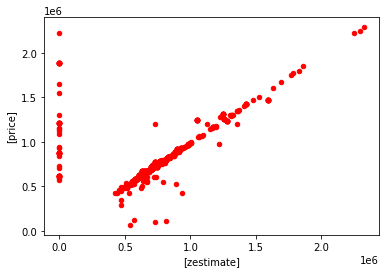

In [ ]:
# Generate a scatterplot

# Placeholder variables: x_var, y_var. 
# (MODIFY THIS PART OF THE CODE FOR A DIFFERENT PROBLEM)
x_var = [ 'zestimate']
y_var = [ 'price']

# Draw the scatterplot
df2.plot.scatter(x=x_var, y=y_var, color = ['red'], legend=False)

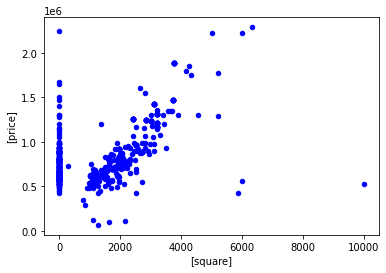

In [ ]:
# Generate a scatterplot based on square and Price

x_var = [ 'square']
y_var = [ 'price']

# Draw the scatterplot
df2.plot.scatter(x=x_var, y=y_var, color = ['blue'], legend=False)

In [ ]:
df3 = df2.copy()
df3 = df3[nvar_list]

             num_of_bed  num_of_bath    square  ...  zestimate  year_built       lot
num_of_bed     1.000000     0.649503  0.367229  ...   0.300562    0.364596  0.278794
num_of_bath    0.649503     1.000000  0.456109  ...   0.415384    0.332559  0.406063
square         0.367229     0.456109  1.000000  ...   0.382397    0.158995  0.415581
price          0.461923     0.598618  0.567370  ...   0.455897   -0.120319  0.623178
zestimate      0.300562     0.415384  0.382397  ...   1.000000    0.108764  0.331558
year_built     0.364596     0.332559  0.158995  ...   0.108764    1.000000 -0.066472
lot            0.278794     0.406063  0.415581  ...   0.331558   -0.066472  1.000000

[7 rows x 7 columns]


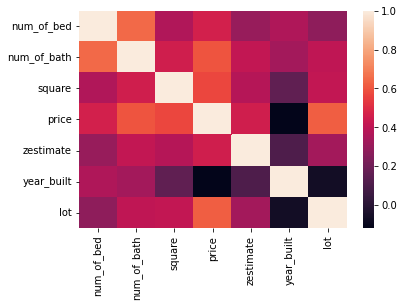

In [ ]:
# Draw a heat map for all the numerical variables in the data frame

# Placeholder variables: df4heatmaps
df4heatmaps = df3

# Compute the correlation matrix 
corr = df4heatmaps.corr()
# Print the correlation matrix
print(corr)
# Draw the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

from the above heatmap of the correlation matrix , we can figure out that DaysOnZillow and viewN are highly correlated, so we may decide only use one of them when we build up the models in the future 

# Association Transformation

In [ ]:
# Set the datatype for the variables in the cvar_list to be categorical in Python
# Set the datatype for the variables in the nvar_list to be numerical in Python 

#drop variables
drop_list = ['h_link', 'zipcode',  'month', 'date','year', 'state']
df4 = df2.copy()
df4 = df4.drop(columns = drop_list)

In [ ]:
import numpy as np
df5 = df4.copy()

In [ ]:
cvar_list = [ 'house_type', 'town', 'heating', 'cooling',  'parking']
df5 = df4[cvar_list].copy()

In [ ]:
#define conditions
conditions = [df4['price'] > df4['zestimate'], 
              df4['price'] < df4['zestimate']]

#define choices
choices = ['1', '0']

#create new column in DataFrame that displays results of comparisons
df5['class'] = np.select(conditions, choices, default='0')
df5['class'] = df5['class'].astype('category')

In [ ]:
# Convert the categorical variables into dummies (Step 1 of dummy coding)
# prefix_sep is the sympol used to create the dummy variable names.
df6 = df5.copy()
df6 = pd.get_dummies(df6, prefix_sep='_')

In [ ]:
df6 = df6.astype('category')

In [ ]:
df6.dtypes

house_type_Multi Family               category
house_type_MultiFamily                category
house_type_Single Family Residence    category
house_type_SingleFamily               category
house_type_Townhouse                  category
house_type_Unknown                    category
town_Bethpage                         category
town_Hicksville                       category
town_Huntington                       category
town_Jericho                          category
town_Melville                         category
town_Plainview                        category
town_Syosset                          category
town_Woodbury                         category
heating_Baseboard                     category
heating_Electric                      category
heating_Forced air                    category
heating_Hot Water                     category
heating_Natural Gas                   category
heating_Oil                           category
heating_Other                         category
heating_Propa

In [ ]:
df7 = df6.copy()

In [ ]:
# Get the remaining variable list after the variable transformation
print(df7.columns.values)

['house_type_Multi Family' 'house_type_MultiFamily'
 'house_type_Single Family Residence' 'house_type_SingleFamily'
 'house_type_Townhouse' 'house_type_Unknown' 'town_Bethpage'
 'town_Hicksville' 'town_Huntington' 'town_Jericho' 'town_Melville'
 'town_Plainview' 'town_Syosset' 'town_Woodbury' 'heating_Baseboard'
 'heating_Electric' 'heating_Forced air' 'heating_Hot Water'
 'heating_Natural Gas' 'heating_Oil' 'heating_Other' 'heating_Propane'
 'cooling_Central' 'cooling_Central Air' 'cooling_Ductless' 'cooling_None'
 'cooling_Other' 'cooling_Wall' 'cooling_Wall Unit(s)'
 'cooling_Window Unit(s)' 'cooling_Zoned' 'parking_0 spaces'
 'parking_1 Attached Garage space' 'parking_1 Garage space'
 'parking_1 Parking space' 'parking_2 Attached Garage spaces'
 'parking_2 Garage spaces' 'parking_2 Parking spaces'
 'parking_3 Attached Garage spaces' 'parking_3 Garage spaces'
 'parking_3 Parking spaces' 'parking_4 Attached Garage spaces'
 'parking_4 Garage spaces' 'parking_4 Parking spaces'
 'parkin

In [ ]:
# Remove the redundant dummies (Step 2 of dummy coding)
# Placeholder variable: rdummies
rdummies = [ 'house_type_Multi Family', 'town_Bethpage', 'heating_Baseboard', 'cooling_Central', 'parking_0 spaces', 'class_1']
df8 = df7.copy()
df8 = df7.drop(columns=rdummies)

# Data Partition
Split the dataset into training part and testing part

In [ ]:


# Required package: scikit-learn. Package name in Python: sklearn
# Required subpackage: model_selection. Required function name: train_test_split
from sklearn.model_selection import train_test_split

# Placeholder variables: df4partition, testpart_size
# test_size specifies the percentage for the test partition
df4partition = df8
testpart_size = 0.2

# random_state specifies the seed for random number generator. 
# random_state = 1 unless otherwised noted
df_nontestData, df_testData = train_test_split(df4partition, test_size=testpart_size, random_state=1)

print(df_nontestData)

    house_type_MultiFamily  ... class_0
382                      0  ...       1
441                      0  ...       1
421                      0  ...       1
363                      0  ...       1
536                      0  ...       1
..                     ...  ...     ...
144                      0  ...       0
645                      0  ...       0
72                       0  ...       0
235                      0  ...       1
37                       0  ...       0

[527 rows x 48 columns]


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

# Separate the predictor values and the DV values into X and y respectively
# Placeholder variable: DV
dv = 'class_0'
y = df_nontestData[dv]
X = df_nontestData.drop(columns=[dv])

# Run Logistic regression with pre-specified penalty level (alpha)
# Placeholder variable: alpha
alpha = 0.01

# The Logistic regression results are put into a model object clf
clf = LogisticRegression(C=1/alpha, penalty='l1', solver='saga', max_iter=200, random_state=1).fit(X,y)

# A user-defined function summary_coef
# to display the estimated coefficients of a model candidate obtained by the Logistic Regression analysis
def summary_coef(model_object):
  n_predictors = X.shape[1]
  model_coef = pd.DataFrame(model_object.coef_.reshape(1, n_predictors), columns=X.columns.values)
  model_coef['Intercept'] = model_object.intercept_
  return model_coef.transpose()

print(summary_coef(clf))


                                            0
house_type_MultiFamily               0.000000
house_type_Single Family Residence   2.234059
house_type_SingleFamily             -3.948193
house_type_Townhouse                -3.367760
house_type_Unknown                  -5.419036
town_Hicksville                     -0.560977
town_Huntington                      0.116376
town_Jericho                        -3.012090
town_Melville                        7.033154
town_Plainview                       0.223069
town_Syosset                         0.995937
town_Woodbury                        0.604333
heating_Electric                     1.371927
heating_Forced air                   1.364118
heating_Hot Water                   -6.109840
heating_Natural Gas                 -3.239136
heating_Oil                         -1.824395
heating_Other                       10.940012
heating_Propane                      1.508071
cooling_Central Air                  1.376313
cooling_Ductless                  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [ ]:
# Run Logistic regression with k-fold cross validation with k=5
# Placeholder variable: kfolds
kfolds = 5

# Here we specify within which range of the penalty levels we will search for the optimal penalty level, 
# i.e., the level that leads to the best model candidate
# We search the optimal alpha within [min_alpha, max_alpha]
min_alpha = 0.001
max_alpha = 100

# C is the inverse of alpha. LogisticRegression and LogisticRegressionCV require inverse alpha 
# as the parameter values for specifying penalty levels


# We further discretize the continuous C range [min_C, max_C] into n individual points of C
# We train n model candidates each of which corresponds to one individual C point
n_candidates = 1000

import numpy as np

# We store the list of individual alpha points into alpha_list
alpha_list = list(np.linspace(min_alpha, max_alpha, num=n_candidates))

# C_list is the element-wise inverse of alpha_list. It is required as one of the paramater values for LogisticRegressionCV
C_list = list(1/np.linspace(min_alpha, max_alpha, num=n_candidates))

# The search criterion is to find the model that maximizes 
# whatever the scoring function - for this case the profit_calculation function - returns.
clf_optimal = LogisticRegressionCV(Cs=C_list, cv=kfolds, penalty='l1', solver='saga', max_iter=200, random_state=1, n_jobs=-1).fit(X,y)

# Display the estimated coefficients of the final selected model
print(summary_coef(clf_optimal))

# Display the optimal alpha that yields the final selected model (the best model candidate)
print(1/clf_optimal.C_)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

                                           0
house_type_MultiFamily              0.000000
house_type_Single Family Residence  1.945608
house_type_SingleFamily             0.000000
house_type_Townhouse                0.000000
house_type_Unknown                 -1.979976
town_Hicksville                    -0.628162
town_Huntington                     0.000000
town_Jericho                       -3.271806
town_Melville                       2.120468
town_Plainview                      0.045572
town_Syosset                        0.856593
town_Woodbury                       0.519086
heating_Electric                    0.000000
heating_Forced air                  0.000000
heating_Hot Water                  -2.261191
heating_Natural Gas                -1.380601
heating_Oil                         0.000000
heating_Other                       4.662353
heating_Propane                     0.000000
cooling_Central Air                 0.828013
cooling_Ductless                   -0.958586
cooling_No

In [ ]:
# Calcuate the average net profit over the test partition based on the final selected model

# y_test_actual is the actual values of the DV in the test partition
y_test_actual = df_testData[dv]

# X_test is the predictor values in the test partition
X_test = df_testData.drop(columns=[dv])

y_test_predicted = clf_optimal.predict(X_test)

from sklearn import metrics
print(metrics.confusion_matrix(y_test_actual,y_test_predicted))
print(clf_optimal.score(X_test,y_test_actual))
# Use the clf_optimal object to apply the model associated with clf_optimal to the test partition
# Use the user-defined profit_calculation function to get the profit


[[17 15]
 [ 6 94]]
0.8409090909090909


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:561: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:561: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


In [ ]:
y_test_actual = df_testData[dv]

X_test = df_testData.drop(columns=[dv])


from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test_actual, clf_optimal.predict_proba(X_test)[:,1]))

0.8681249999999999


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:561: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


In [ ]:
df9 = df8.copy()
df9.shape

(659, 48)

In [ ]:
df2['price'].count()

659

In [ ]:
df9['price'] = df2['price'].copy()
df9['price']=(df9['price']-df9['price'].mean())/df9['price'].std()

In [ ]:
# Required package: scikit-learn. Package name in Python: sklearn
# Required subpackage: model_selection. Required function name: train_test_split
from sklearn.model_selection import train_test_split

# Placeholder variables: df4partition3, testpart_size
# test_size specifies the percentage for the test partition
df4partition3 = df9
testpart_size = 0.2

# random_state specifies the seed for random number generator. 
# random_state = 1 unless otherwised noted
df_nontestData3, df_testData3 = train_test_split(df4partition3, test_size=testpart_size, random_state=1)

print(df_nontestData3)

    house_type_MultiFamily house_type_Single Family Residence  ... class_0     price
382                      0                                  1  ...       1 -0.710622
441                      0                                  1  ...       1 -0.584803
421                      0                                  1  ...       1 -0.396075
363                      0                                  1  ...       1 -0.065800
536                      0                                  1  ...       1 -0.138146
..                     ...                                ...  ...     ...       ...
144                      0                                  1  ...       0 -0.676021
645                      0                                  0  ...       0 -0.396075
72                       0                                  1  ...       0  3.276262
235                      0                                  0  ...       1 -0.718485
37                       0                                  1  ..

In [ ]:

from sklearn.linear_model import Lasso, LassoCV

# Separate the predictor values and the DV values into X and y respectively
# Placeholder variable: DV
DV = 'price'
y = df_nontestData3[DV]
X = df_nontestData3.drop(columns=[DV])

# Run Lasso with pre-specified penalty level (alpha)
# Placeholder variable: alpha
alpha = 0.01

# The Lasso results are put into a Lasso model object clf
clf = Lasso(alpha=alpha, random_state=1).fit(X,y)

# A user-defined function summary_coef
# to display the estimated coefficients of a model candidate obtained by the Lasso analysis
# Input:  a Lasso model object which is the output of the function Lasso 
# Output: the estimated coefficients of the model candidate reported by the input Lasso model object
def summary_coef(model_object):
  n_predictors = X.shape[1]
  model_coef = pd.DataFrame(model_object.coef_.reshape(1, n_predictors), columns=X.columns.values)
  model_coef['Intercept'] = model_object.intercept_
  return model_coef.transpose()

# Run Lasso with k-fold cross validation with k=5
# Placeholder variable: kfolds
kfolds = 5

# Set n_jobs to be -1 to run LassoCV on all CPU cores.
clf_optimal = LassoCV(cv=kfolds, random_state=1, n_jobs=-1).fit(X,y)

# Display the optimal alpha that yields the final selected model (the best model candidate)
print(clf_optimal.alpha_)

# Display the estimated coefficients of the final selected model
print(summary_coef(clf_optimal))

# Calcuate the ASE over the test partition based on the final selected model

# y_test_actual is the actual values of the DV in the test partition
y_test_actual3 = df_testData3[DV]

# X_test is the predictor values in the test partition
X_test3 = df_testData3.drop(columns=[DV])

# Use predict method of the clf_optimal object to apply the model associated with clf_optimal to the test partition
# y_test_predicted is the predicted values of the DV in the test partition 
y_test_predicted3 = clf_optimal.predict(X_test3)

# Get the number of obs in the test partition
n_obs_test3 = df_testData.shape[0]

# Derive ASE over the test partition based on the definition of ASE
ASE_test3 = sum((y_test_actual3 - y_test_predicted3)**2)/n_obs_test3

print(ASE_test3)

0.0029345239062161365
                                           0
house_type_MultiFamily              0.000000
house_type_Single Family Residence -0.056048
house_type_SingleFamily             0.000000
house_type_Townhouse                0.000000
house_type_Unknown                 -0.000000
town_Hicksville                    -0.466952
town_Huntington                     1.117142
town_Jericho                        0.083422
town_Melville                       0.698158
town_Plainview                     -0.102889
town_Syosset                        0.480419
town_Woodbury                       1.774334
heating_Electric                    0.000000
heating_Forced air                 -0.000000
heating_Hot Water                   0.000000
heating_Natural Gas                -0.163655
heating_Oil                        -0.449752
heating_Other                      -0.631730
heating_Propane                     0.000000
cooling_Central Air                 0.339905
cooling_Ductless                 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:561: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
